Elapsed time of the __build_tree function: 0.02 seconds


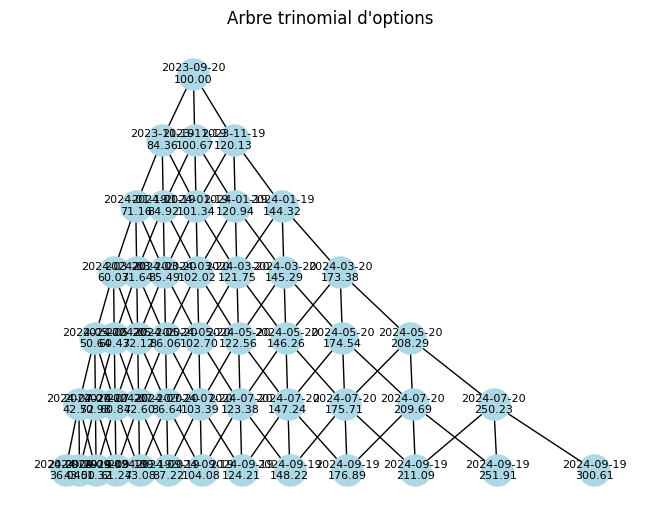

Elapsed time of the price function: 1.53 seconds


In [4]:
from pricing_library.market import Market
from pricing_library.option import Option
from pricing_library.trinomial_tree import TrinomialTree

from datetime import datetime

t = TrinomialTree(
    market=Market(
        interest_rate=0.04,
        volatility=0.25,
        spot_price=100,
        dividend_price=0,
        dividend_ex_date=datetime(2024, 5, 24),
    ),
    pricing_date=datetime(2023, 9, 20),
    n_steps=6,
)
price = t.price(
    opt=Option(
        option_type="call",
        exercise_type="eu",
        strike_price=102,
        maturity_date=datetime(2024, 9, 19),
    ),
    draw_tree=True
)


In [2]:
price

10.698200770184103

In [3]:
t.root

Node<spot price: 100.00, next mid price: : 100.67, next up price: 120.13, next down price: 84.36, variance: 106.12, p down: 0.18, p mid: 0.67, p up: 0.15, current date: 2023-09-20 00:00:00, option value: 10.70>

In [ ]:
from typing import Optional
from pricing_library.node import Node
import networkx as nx
import matplotlib.pyplot as plt

def plot_tree(t):
    G = nx.Graph()
    nodes: list[tuple[Node, Optional[Node], int]] = [
        (t.root, None, 0)
    ]  # (current, parent, depth)

    while nodes:
        current, parent, depth = nodes.pop()
        G.add_node(current, pos=(current.spot_price, -depth))
        if parent is not None:
            G.add_edge(parent, current)

        # Ajouter les nœuds enfants à la liste pour traitement ultérieur
        if current.next_upper_node:
            nodes.append((current.next_upper_node, current, depth + 1))
        if current.next_mid_node:
            nodes.append((current.next_mid_node, current, depth + 1))
        if current.next_lower_node:
            nodes.append((current.next_lower_node, current, depth + 1))

    pos = nx.get_node_attributes(G, "pos")
    labels = {node: f"{datetime.strftime(node.time_step, '%Y-%m-%d')}\n{node.spot_price:.2f}" for node in G.nodes()}
    
    nx.draw(
        G,
        pos,
        labels=labels,
        with_labels=True,
        node_size=500,
        node_color="lightblue",
        font_size=8,
        font_color="black",
    )
    plt.title("Arbre trinomial d'options")
    plt.axis("off")
    plt.show()


plot_tree(t)

In [ ]:
# params = {"n": 2000,
#           "s0": 100,
#           "vol": 0.25,
#           "rate": 0.04,
#           "strike": 102,
#           "maturity": datetime.date(year=2024, month=9, day=19),
#           "t0": datetime.date(year=2023, month=9, day=20),
#           "market": "european",
#           "div": 0
#           }
